In [1]:
import pandas as pd

file_path = "Customer-Churn-Records.csv"

data1 = pd.read_csv(file_path)

In [2]:
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
data1.drop(columns=["RowNumber", "Surname", "Gender", "Geography"], inplace=True)

In [4]:
data1.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data1.to_csv("data1.csv", index=False)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [6]:
sum_exited = (data1["Exited"] == 1).sum()
sum_complain = (data1["Complain"] == 1).sum()

if sum_exited > 0:
    percentage_complain_over_exited = (sum_complain / sum_exited) * 100
else:
    percentage_complain_over_exited = 0

print(f"Sum of Exited = {sum_exited}")
print(f"Sum of Complains = {sum_complain}")
print(f"Percentage of complaints over exited customers = {percentage_complain_over_exited:.2f}%")

Sum of Exited = 2038
Sum of Complains = 2044
Percentage of complaints over exited customers = 100.29%


In [8]:
age = 50

In [9]:
sum_age_and_over_among_exited = data1[(data1["Age"] >= age) & (data1["Exited"] == 1)].shape[0]
sum_exited = data1["Exited"].sum()

if sum_exited > 0:
    percentage_age_and_over_among_exited = (sum_age_and_over_among_exited / sum_exited) * 100
else:
    percentage_age_and_over_among_exited = 0

print(f"Sum of Age {age} and Over among Exited = {sum_age_and_over_among_exited}")
print(f"Sum of Exited = {sum_exited}")
print(f"Percentage of customers aged {age} and over who exited = {percentage_age_and_over_among_exited:.2f}%")

Sum of Age 50 and Over among Exited = 634
Sum of Exited = 2038
Percentage of customers aged 50 and over who exited = 31.11%


In [10]:
salary_threshold = 100000

In [11]:
sum_salary_over_among_exited = data1[(data1["EstimatedSalary"] >= salary_threshold) & (data1["Exited"] == 1)].shape[0]
sum_exited = data1["Exited"].sum()

if sum_exited > 0:
    percentage_salary_over_among_exited = (sum_salary_over_among_exited / sum_exited) * 100
else:
    percentage_salary_over_among_exited = 0

print(f"Sum of Salary over {salary_threshold} among Exited = {sum_salary_over_among_exited}")
print(f"Sum of Exited = {sum_exited}")
print(f"Percentage of customers with salary over {salary_threshold} who exited = {percentage_salary_over_among_exited:.2f}%")

Sum of Salary over 100000 among Exited = 1045
Sum of Exited = 2038
Percentage of customers with salary over 100000 who exited = 51.28%


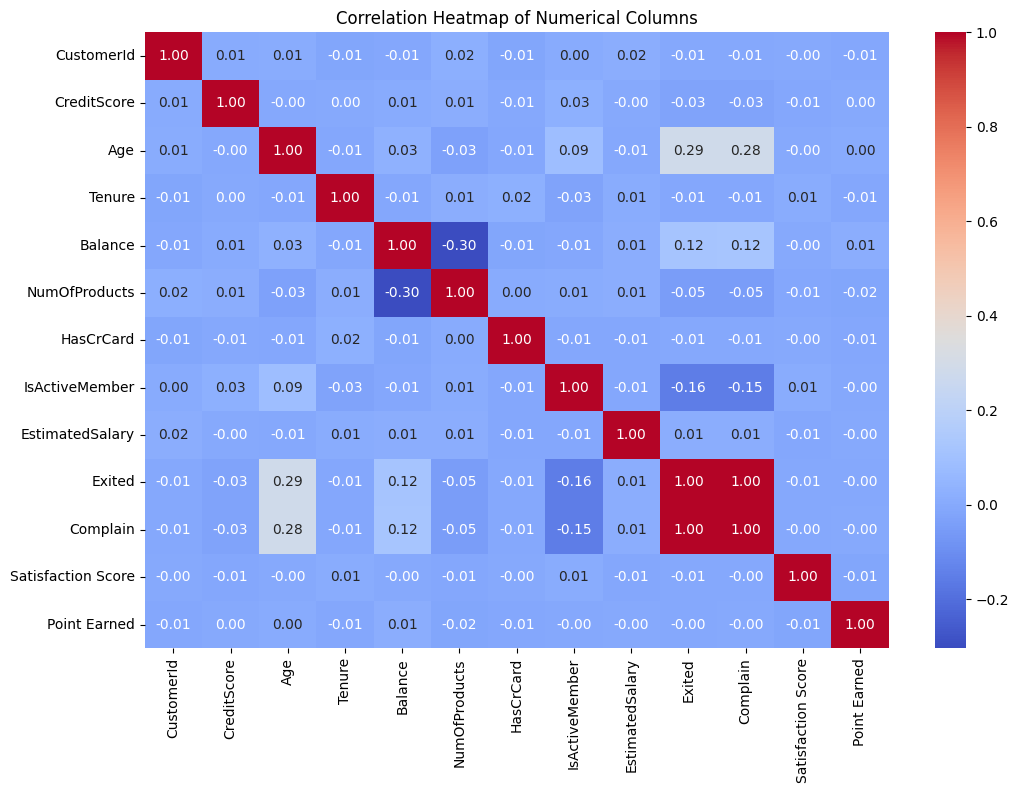

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = data1.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(12, 8))
sns.heatmap(data1[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [13]:
numerical_columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

### Training a Machine Learning Model

In [14]:
data2 = data1.copy()

In [20]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


features = data2[['CreditScore', 'Age', 'EstimatedSalary', 'Exited', 'Complain', 'Point Earned']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [17]:
features.head()

,CreditScore,Age,EstimatedSalary,Exited,Complain,Point Earned
0,619,42,101348.88,1,1,464
1,608,41,112542.58,0,1,456
2,502,42,113931.57,1,1,377
3,699,39,93826.63,0,0,350
4,850,43,79084.10,0,0,425


In [22]:
features_scaled.shape

(10000, 6)

In [24]:
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    db_index = davies_bouldin_score(features_scaled, cluster_labels)
    print(f"For n_clusters={n_clusters}, the silhouette score is {silhouette_avg:.4f} and the Davies-Bouldin Index is {db_index:.4f}")

For n_clusters=2, the silhouette score is 0.4172 and the Davies-Bouldin Index is 1.0582
For n_clusters=3, the silhouette score is 0.2104 and the Davies-Bouldin Index is 1.7406
For n_clusters=4, the silhouette score is 0.2228 and the Davies-Bouldin Index is 1.5454


In [25]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)

data2['class'] = kmeans.fit_predict(features_scaled)

In [26]:
data2.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,class
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0


In [27]:
sum_class_1 = (data2['class'] == 1).sum()
sum_class_1_complain_1 = data2[(data2['class'] == 1) & (data2['Complain'] == 1)].shape[0]
sum_class_1_exited_1 = data2[(data2['class'] == 1) & (data2['Exited'] == 1)].shape[0]

print(f"Sum of 'class' == 1: {sum_class_1}")
print(f"Sum of 'class' == 1 and 'Complain' == 1: {sum_class_1_complain_1}")
print(f"Sum of 'class' == 1 and 'Exited' == 1: {sum_class_1_exited_1}")

Sum of 'class' == 1: 2038
Sum of 'class' == 1 and 'Complain' == 1: 2036
Sum of 'class' == 1 and 'Exited' == 1: 2036


In [28]:
sum_class_0 = (data2['class'] == 0).sum()
sum_class_0_complain_1 = data2[(data2['class'] == 0) & (data2['Complain'] == 1)].shape[0]
sum_class_0_exited_1 = data2[(data2['class'] == 0) & (data2['Exited'] == 1)].shape[0]

print(f"Sum of 'class' == 0: {sum_class_0}")
print(f"Sum of 'class' == 0 and 'Complain' == 1: {sum_class_0_complain_1}")
print(f"Sum of 'class' == 0 and 'Exited' == 1: {sum_class_0_exited_1}")

Sum of 'class' == 0: 7962
Sum of 'class' == 0 and 'Complain' == 1: 8
Sum of 'class' == 0 and 'Exited' == 1: 2
